In [103]:
import pandas as pd

In [104]:
df = pd.read_csv('instagram.csv')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Influencer insta name     1000 non-null   object
 1   instagram name            979 non-null    object
 2   category_1                892 non-null    object
 3   category_2                287 non-null    object
 4   Followers                 1000 non-null   object
 5   Audience country(mostly)  986 non-null    object
 6   Authentic engagement
    1000 non-null   object
 7   Engagement avg
          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [106]:
df.describe()

,Influencer insta name,instagram name,category_1,category_2,Followers,Audience country(mostly),Authentic engagement\r\n,Engagement avg\r\n
count,1000,979,892,287,1000,986,1000,1000
unique,997,975,31,27,411,32,850,778
top,angelinajolie,Bruno Goes 🎭,Music,Cinema & Actors/actresses,6M,United States,1.1M,1.1M
freq,2,2,235,59,11,279,22,28


In [115]:
#corrijo nombres de las columnas para mantener formato snake
df.columns = ['cuenta_instagram', 'nombre_del_influencer', 'categoria_principal',
              'categoria_alternativa', 'seguidores', 'pais_audiencia', 'engagement',
              'engagement_promedio']


,cuenta_instagram,nombre_del_influencer,categoria_principal,seguidores,pais_audiencia,engagement,engagement_promedio
0,433,433,Sports with a ball,48500000.0,Spain,383100.0,637000.0
1,__youngbae__,TAEYANG,Music,12700000.0,Indonesia,478000.0,542300.0
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,18800000.0,Russia,310800.0,377900.0
3,_imyour_joy,Joy,Lifestyle,13500000.0,Indonesia,1100000.0,1400000.0
4,_jeongjaehyun,Jaehyun,no tiene,11100000.0,Indonesia,2500000.0,3100000.0
...,...,...,...,...,...,...,...
995,zendaya,Zendaya,Cinema & Actors/actresses,136100000.0,United States,6400000.0,8600000.0
996,zidane,zidane,Sports with a ball,31200000.0,Spain,546000.0,744100.0
997,zkdlin,KAI,Music,13900000.0,Indonesia,1300000.0,1600000.0
998,zoeisabellakravitz,Zoë Kravitz,Cinema & Actors/actresses,8200000.0,United States,583000.0,885500.0


In [124]:
df = df.drop(columns = ['categoria_alternativa'])

In [108]:
#en el caso de no tener el instagram del influencer, consideramos su nombre como el nombre de la cuenta.
#optamos por hacer esto por el hecho de que estos valors NaN si tienen informacion en los campos de seguidores
#y de engagement
df['cuenta_instagram'] = df['cuenta_instagram'].fillna(df['nombre_del_influencer'])

In [109]:
#en el caso del resto de las categorias utilizaremos el valor arbitrario "no tiene" para llenar los missing values.
df = df.fillna('no tiene')

In [110]:
#elimino duplicados
df = df.drop_duplicates(subset=['nombre_del_influencer'])

In [111]:
#transformaciones para poder operar
for i in df.columns:
    if i == 'engagement' or i == 'engagement_promedio' or i == 'seguidores':
        df[i] = df[i].replace({'K': '*1000', 'M': '*1000000'}, regex=True).map(pd.eval).astype(float)

In [127]:
#creo columnas calculadas para el analisis
df['porcentaje_engaged'] = df['engagement_promedio']/df['seguidores']*100

In [128]:
#datos generales del df
df_top5 = df.nlargest(5,['seguidores'])


<AxesSubplot:>

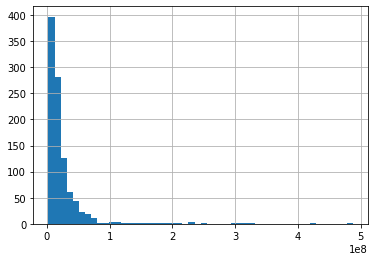

In [35]:
df.seguidores.hist(bins=50)

In [28]:
seguidores_mean = df.seguidores.mean()
seguidores_std = df.seguidores.std()

In [36]:
lower_limit = seguidores_mean - 3 * seguidores_std
upper_limit = seguidores_std + 3 * seguidores_std

#no hay valores por debajo del lower limit
#se opta por no eliminar los valore por encima del maximo visto que muestran a los "mas famosos" - 
#messi, beyonce, justin bieber, etc.

,nombre_del_influencer,cuenta_instagram,categoria_principal,categoria_alternativa,seguidores,pais_audiencia,engagement,engagement_promedio,porcentaje_engaged
0,433,433,Sports with a ball,no tiene,48500000.0,Spain,383100.0,637000.0,1.313402
1,__youngbae__,TAEYANG,Music,no tiene,12700000.0,Indonesia,478000.0,542300.0,4.270079
2,_agentgirl_,НАСТЯ ИВЛЕЕВА,Shows,no tiene,18800000.0,Russia,310800.0,377900.0,2.010106
3,_imyour_joy,Joy,Lifestyle,no tiene,13500000.0,Indonesia,1100000.0,1400000.0,10.370370
4,_jeongjaehyun,Jaehyun,no tiene,no tiene,11100000.0,Indonesia,2500000.0,3100000.0,27.927928


In [78]:
df_alt = df[df.pais_audiencia != 'no tiene']
df_por_pais = df_alt.groupby(['pais_audiencia']), index_col = 0).mean()

SyntaxError: cannot assign to function call (4215116263.py, line 2)

In [69]:
df_alt = df[df.categoria_principal != 'no tiene']
df_por_categoria = df_alt.groupby(['categoria_principal']).mean()

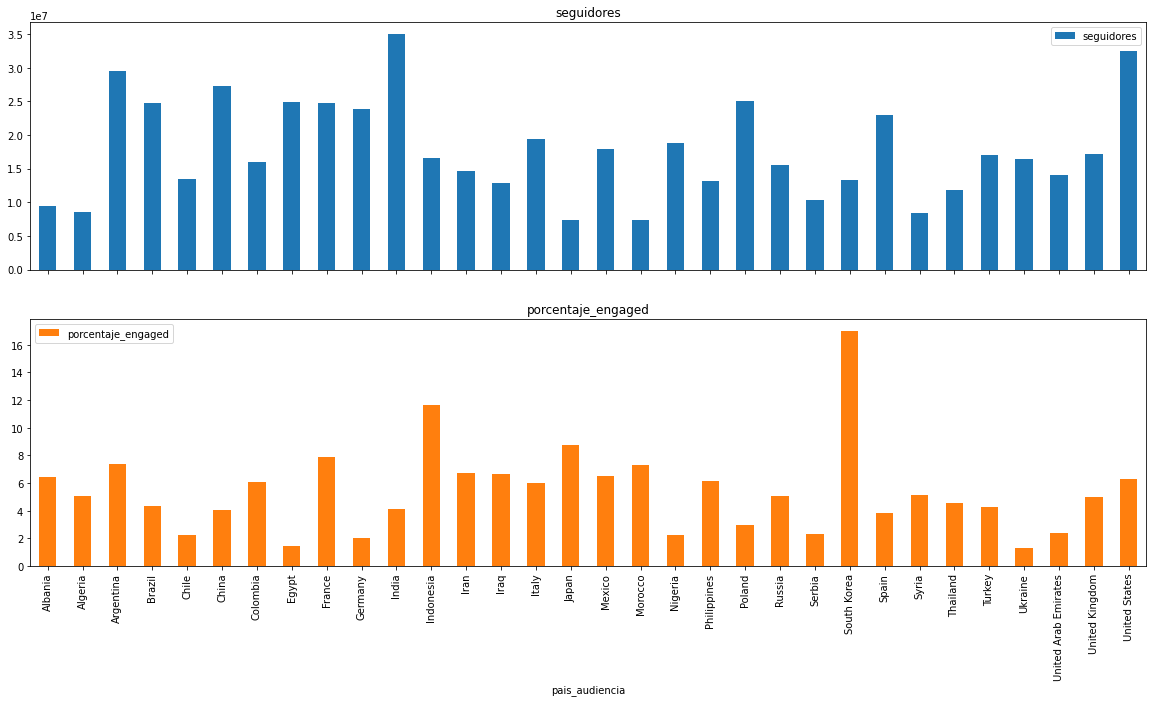

In [135]:
graph_por_pais = df_por_pais.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_por_pais.plot.bar(rot = 90, subplots=True, sort_columns = True, figsize = (20,10))

ax[1].legend(loc=2)  

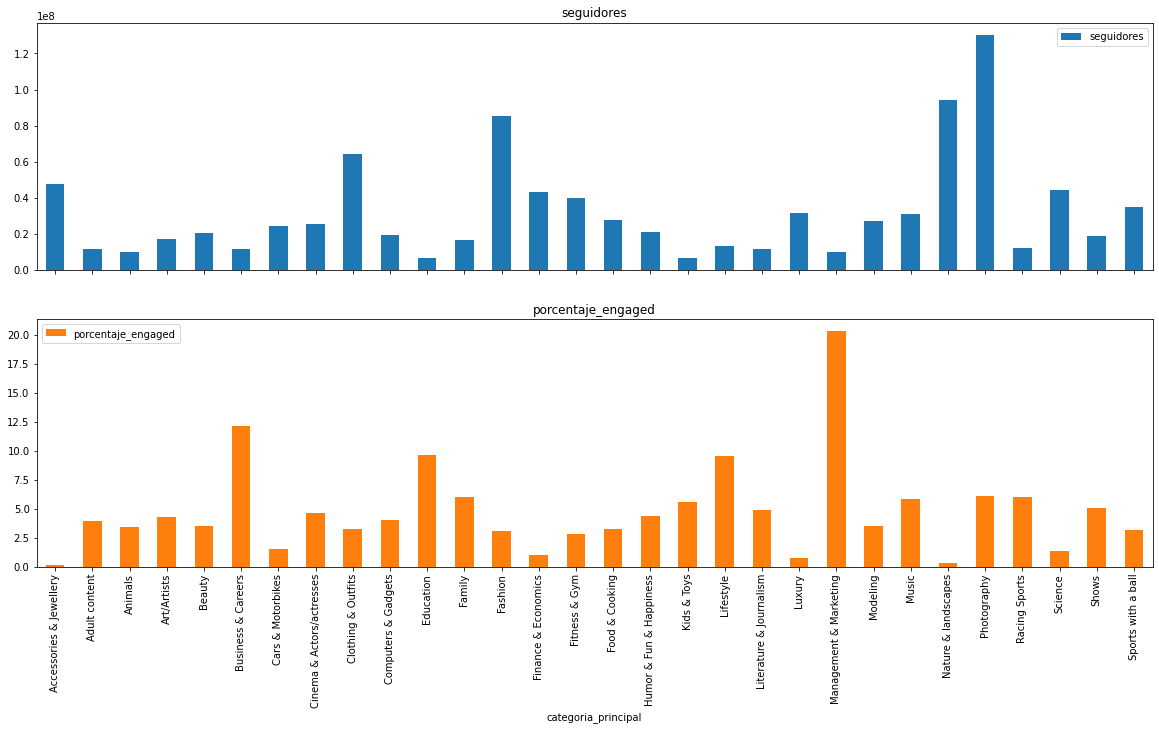

In [134]:
graph_por_categoria = df_por_categoria.drop(columns = ['engagement', 'engagement_promedio'])
ax = graph_por_categoria.plot.bar(rot = 90, subplots=True, sort_columns = True, figsize=(20,10))

ax[1].legend(loc=2)

In [120]:
! pip install tabulate

In [129]:
df_top5.to_markdown()


'|     | cuenta_instagram   | nombre_del_influencer   | categoria_principal   |   seguidores | pais_audiencia   |   engagement |   engagement_promedio |   porcentaje_engaged |\n|----:|:-------------------|:------------------------|:----------------------|-------------:|:-----------------|-------------:|----------------------:|---------------------:|\n| 388 | instagram          | Instagram               | Photography           |    4.872e+08 | India            | 352300       |         467400        |             0.095936 |\n| 203 | cristiano          | Cristiano Ronaldo       | Sports with a ball    |    4.196e+08 | India            |      5.7e+06 |              7e+06    |             1.66826  |\n| 510 | kyliejenner        | Kylie 🤍                | Fashion               |    3.233e+08 | United States    |      7.6e+06 |              1.23e+07 |             3.80452  |\n| 532 | leomessi           | Leo Messi               | Sports with a ball    |    3.154e+08 | Argentina        |      4e